<a href="https://colab.research.google.com/github/nickmirunsw/py-learning/blob/main/tensorflow/tfnm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CHATGPT CHEATSHEET FOR TENSORFLOW***



In [1]:
# chatgpt cheatsheet and example

# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt

# # 1. Core TensorFlow Operations
# print("\n### Core TensorFlow Operations ###")
# constant_tensor = tf.constant([1, 2, 3], dtype=tf.float32, name="my_constant")
# variable_tensor = tf.Variable(initial_value=[4, 5, 6], trainable=True, dtype=tf.float32, name="my_variable")

# print("Constant:", constant_tensor.numpy())
# print("Variable:", variable_tensor.numpy())

# # 2. Keras Model Building
# print("\n### Keras Model Building ###")
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=128, activation='relu', input_shape=(64,), name="dense_1"),
#     tf.keras.layers.BatchNormalization(name="batch_norm_1"),
#     tf.keras.layers.Dropout(rate=0.2, name="dropout_1"),
#     tf.keras.layers.Dense(units=64, activation='relu', name="dense_2"),
#     tf.keras.layers.BatchNormalization(name="batch_norm_2"),
#     tf.keras.layers.Dense(units=10, activation='softmax', name="output")
# ], name="sequential_model")

# model.summary()

# # 3. Model Compilation
# print("\n### Model Compilation ###")
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#     loss=tf.keras.losses.CategoricalCrossentropy(),
#     metrics=['accuracy']
# )

# # 4. Data Preprocessing
# print("\n### Data Preprocessing ###")
# x_train = np.random.rand(1000, 64)  # Dummy training data (1000 samples, 64 features)
# y_train = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(1000,)), num_classes=10)

# x_val = np.random.rand(200, 64)  # Validation data
# y_val = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(200,)), num_classes=10)

# # Normalize data (common preprocessing step)
# x_train = (x_train - np.mean(x_train)) / np.std(x_train)
# x_val = (x_val - np.mean(x_val)) / np.std(x_val)

# # 5. Model Training with Callbacks
# print("\n### Model Training ###")
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=3, restore_best_weights=True, verbose=1
# )
# history = model.fit(
#     x=x_train,
#     y=y_train,
#     validation_data=(x_val, y_val),
#     epochs=20,
#     batch_size=32,
#     callbacks=[early_stopping],
#     verbose=1
# )

# # 6. Visualizing Training History
# print("\n### Visualizing Training History ###")
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Loss Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Accuracy Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # 7. Model Evaluation
# print("\n### Model Evaluation ###")
# loss, accuracy = model.evaluate(x_val, y_val, verbose=1)
# print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

# # 8. Model Prediction
# print("\n### Model Prediction ###")
# predictions = model.predict(x_val[:5])
# print("Predictions (softmax probabilities):", predictions)

# # 9. Transfer Learning with Pretrained Models
# print("\n### Transfer Learning ###")
# base_model = tf.keras.applications.MobileNetV2(
#     input_shape=(128, 128, 3),
#     include_top=False,
#     weights='imagenet'
# )
# base_model.trainable = False

# transfer_model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
#     base_model,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

# transfer_model.compile(
#     optimizer=tf.keras.optimizers.Adam(),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )
# transfer_model.summary()

# # Dummy image data
# x_train_images = np.random.rand(100, 128, 128, 3)  # 100 RGB images of size 128x128
# y_train_images = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(100,)), num_classes=10)

# x_val_images = np.random.rand(20, 128, 128, 3)
# y_val_images = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(20,)), num_classes=10)

# # Train transfer learning model
# transfer_model.fit(
#     x=x_train_images,
#     y=y_train_images,
#     validation_data=(x_val_images, y_val_images),
#     epochs=5,
#     batch_size=16
# )

# # 10. Model Saving and Loading
# print("\n### Model Saving and Loading ###")
# model.save("my_model.h5")
# loaded_model = tf.keras.models.load_model("my_model.h5")
# print("Model loaded successfully!")

# # 11. TensorFlow Dataset API
# print("\n### TensorFlow Dataset API ###")
# dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# dataset = dataset.shuffle(buffer_size=100).batch(32).prefetch(tf.data.AUTOTUNE)

# for batch in dataset.take(1):
#     print("A batch of data:", batch)

# # 12. Advanced TensorFlow Features: Gradient Tape
# print("\n### Gradient Tape ###")
# x = tf.constant(3.0)
# y = tf.constant(4.0)

# with tf.GradientTape() as tape:
#     tape.watch(x)
#     z = x ** 2 + y ** 2
# gradients = tape.gradient(z, x)
# print("Gradient of z with respect to x:", gradients.numpy())


***TUTORIAL 7 =================================================***

In [2]:
from ast import increment_lineno
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
x_test_flattened = x_test.reshape(10000, 784)
x_train_flattened = x_train.reshape(60000, 784)

In [6]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

model.evaluate(x_test_flattened, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8118 - loss: 0.7227
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9153 - loss: 0.3071
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9215 - loss: 0.2818
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9225 - loss: 0.2745
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9266 - loss: 0.2650
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9141 - loss: 0.3054


[0.2689920663833618, 0.9258999824523926]

In [7]:
y_predict = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [8]:
print(y_test[1])
print(np.argmax(y_predict[1]))

2
2


In [9]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=np.argmax(y_predict, axis=1))

Text(95.72222222222221, 0.5, 'Truth')

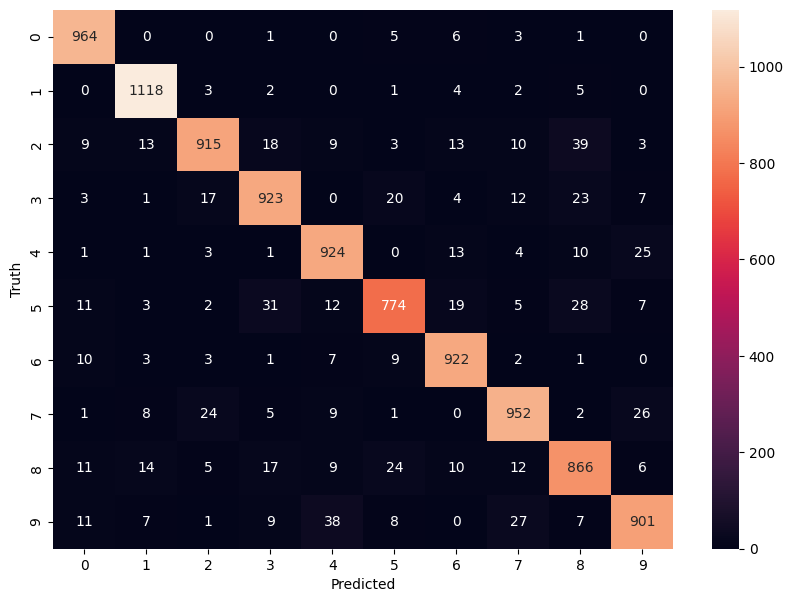

In [10]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [11]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

model.evaluate(x_test_flattened, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8736 - loss: 0.4503
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9606 - loss: 0.1341
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9736 - loss: 0.0891
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9802 - loss: 0.0654
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9851 - loss: 0.0502
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9693 - loss: 0.1043


[0.0890272930264473, 0.9732000231742859]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

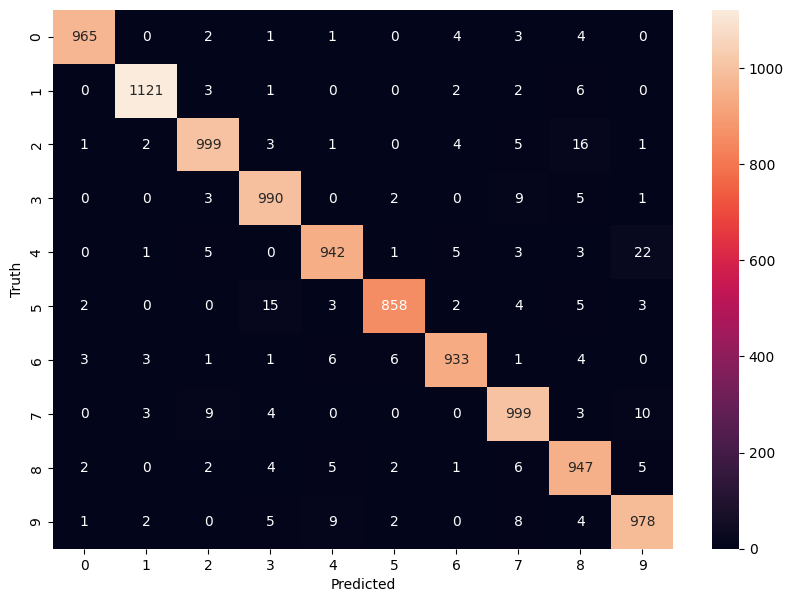

In [12]:
y_predict = model.predict(x_test_flattened)
cm = tf.math.confusion_matrix(labels=y_test, predictions=np.argmax(y_predict, axis=1))

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

y_predict = model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8718 - loss: 0.4604
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9600 - loss: 0.1370
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9713 - loss: 0.0926
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9811 - loss: 0.0635
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9855 - loss: 0.0493
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.0910
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


***TUTORIAL 8 =================================================***

In [14]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

sigmoid(-56)

4.780892883885469e-25

In [15]:
def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

tanh(-56)

-1.0

In [16]:
def relu(x):
  return max(0, x)

relu(-100)

0

In [17]:
def leaky_relu(x):
  return max(0.1*x, x)

leaky_relu(-100)

-10.0

***TUTORIAL 10 =================================================***

In [18]:
revenue = np.array([[180, 200, 220], [24, 36, 40], [12, 18, 20]])
expenses = np.array([[80, 90, 100], [10, 16, 20], [8, 10, 10]])

In [19]:
profit = revenue - expenses
print(profit)

[[100 110 120]
 [ 14  20  20]
 [  4   8  10]]


In [20]:
price_per_unit = np.array([1000, 400, 1200])
units = np.array([[30, 30, 50], [5, 10, 15], [2, 5, 7]])
sales = np.dot(price_per_unit,units)
print(sales)

[34400 40000 64400]


***TUTORIAL 11 =================================================***

In [21]:
y_predicted = np.array([1, 1, 0, 0, 1])
y_true = np.array([0.30, 0.70, 1, 0, 0.5])

In [22]:
def mae(y_predicted, y_true):
  return np.average(np.abs(y_predicted - y_true))

mae(y_predicted, y_true)


0.5

In [23]:
def log_loss(y_predicted, y_true):
    # Clip predicted values to avoid log(0)
    y_predicted = np.clip(y_predicted, 1e-15, 1 - 1e-15)

    # Correct log loss formula
    return -np.average(y_true * np.log(y_predicted) + (1 - y_true) * np.log(1 - y_predicted))

log_loss(y_predicted, y_true)

17.2696280766844

In [24]:
def mse(y_predicted, y_true):
  return np.mean(np.power((y_predicted - y_true), 2))

mse(y_predicted, y_true)

0.366

***TUTORIAL 12 =================================================***

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/refs/heads/master/6_gradient_descent/insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [26]:
df['age'] = df['age'] /(df['age'].max())

In [27]:
df.head()

,age,affordibility,bought_insurance
0,0.354839,1,0
1,0.403226,0,0
2,0.758065,1,1
3,0.838710,0,0
4,0.741935,1,1


In [28]:
from sklearn.model_selection import train_test_split

# Splitting dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'affordibility']], df.bought_insurance, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 22
Testing set size: 6


In [29]:
print(X_train)

         age  affordibility
17  0.935484              1
22  0.645161              1
11  0.451613              1
13  0.467742              0
15  0.887097              1
1   0.403226              0
4   0.741935              1
5   0.903226              1
2   0.758065              1
16  0.403226              0
23  0.725806              1
3   0.838710              0
26  0.370968              1
24  0.806452              1
18  0.306452              0
27  0.741935              1
20  0.338710              1
7   0.967742              0
10  0.290323              1
14  0.790323              1
19  0.290323              1
6   0.887097              0


In [30]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(1, activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step - accuracy: 0.5000 - loss: 0.7806
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.7801
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 0.7795
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.7790
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.7784
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5000 - loss: 0.7779
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5000 - loss: 0.7773
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.7768
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.5000 - loss: 0.7763
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.7757
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.7752
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - 

In [31]:
y_predict = model.predict(X_test)
y_predict = np.round(y_predict, 2)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[0.71],
       [0.69],
       [0.71],
       [0.47],
       [0.61],
       [0.47]], dtype=float32)

In [32]:
print(y_test)

9     1
25    1
8     1
21    0
0     0
12    0
Name: bought_insurance, dtype: int64


In [33]:
coef, intercept = model.get_weights()
print(coef)
print(intercept)

[[0.68153673]
 [0.6272739 ]]
[-0.40538993]


In [34]:
def prediction_function(age, affordibility):
  weighted_sum =  age * coef[0] + affordibility * coef[1] + intercept
  return sigmoid(weighted_sum)


In [35]:
X_test

,age,affordibility
9,0.983871,1
25,0.870968,1
8,1.000000,1
21,0.419355,0
0,0.354839,1
12,0.435484,0


In [36]:
prediction_function(0.983, 1)

<ipython-input-14-1aa4ded09e79>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.709268627899353

In [37]:
def log_loss(y_predicted, y_true):
    # Clip predicted values to avoid log(0)
    y_predicted = np.clip(y_predicted, 1e-15, 1 - 1e-15)
    return np.average(
        -y_true * np.log(y_predicted) - (1 - y_true) * np.log(1 - y_predicted)
    )

In [38]:
def numpy_sigmoid(X):
  return 1/(1+np.exp(-X))

In [39]:
def gradient_descent(age, affordibility, y_true, epochs):
  w1 = w2 = 1
  bias = 0
  epochs = epochs
  rate = 0.5
  n = len(age)

  for i in range(1, epochs):
    y_p = age * w1 + affordibility * w2 + bias
    y_p_sigmoid = numpy_sigmoid(y_p)
    loss = log_loss(y_p_sigmoid, y_train)
    print(f'loss at epoch:{i} is {loss:2f}')
    print(f'w1 = {w1:2f}, w2 = {w2:2f}, bias = {bias:2f}')
    w1 = w1 - rate * (np.dot(age, np.transpose(y_p_sigmoid - y_true)))*(1/n)
    w2 = w2 - rate * (np.dot(affordibility, np.transpose(y_p_sigmoid - y_true)))*(1/n)
    bias = bias - rate * np.mean(y_p_sigmoid - y_true)
    epochs += 1

  return w1, w2, bias


In [40]:
print(X_train['age'].shape)
print(X_train['affordibility'].shape)
print(y_train.shape)

(22,)
(22,)
(22,)


In [41]:
gradient_descent(X_train['age'], X_train['affordibility'], y_train, 50)

loss at epoch:1 is 0.780631
w1 = 1.000000, w2 = 1.000000, bias = 0.000000
loss at epoch:2 is 0.727557
w1 = 0.943324, w2 = 0.919572, bias = -0.137722
loss at epoch:3 is 0.689616
w1 = 0.898493, w2 = 0.851892, bias = -0.256407
loss at epoch:4 is 0.663493
w1 = 0.864898, w2 = 0.796607, bias = -0.357168
loss at epoch:5 is 0.645963
w1 = 0.841406, w2 = 0.752669, bias = -0.441888
loss at epoch:6 is 0.634333
w1 = 0.826614, w2 = 0.718623, bias = -0.512842
loss at epoch:7 is 0.626581
w1 = 0.819060, w2 = 0.692880, bias = -0.572349
loss at epoch:8 is 0.621297
w1 = 0.817378, w2 = 0.673914, bias = -0.622557
loss at epoch:9 is 0.617550
w1 = 0.820374, w2 = 0.660369, bias = -0.665334
loss at epoch:10 is 0.614747
w1 = 0.827048, w2 = 0.651098, bias = -0.702235
loss at epoch:11 is 0.612520
w1 = 0.836582, w2 = 0.645158, bias = -0.734524
loss at epoch:12 is 0.610644
w1 = 0.848327, w2 = 0.641796, bias = -0.763207
loss at epoch:13 is 0.608981
w1 = 0.861769, w2 = 0.640415, bias = -0.789077
loss at epoch:14 is 0.

(1.5109570260949845, 0.7760497086503022, -1.3771108839746358)

***TUTORIAL 13 =================================================***

In [42]:
class myNN:
  def __init__(self):
    self.w1 = 1
    self.w2 = 1
    self.bias = 0

  def gradient_descent(self, age, affordibility, y_true, epochs):
    w1 = w2 = 1
    bias = 0
    epochs = epochs
    rate = 0.5
    n = len(age)

    for i in range(1, epochs):
      y_p = age * w1 + affordibility * w2 + bias
      y_p_sigmoid = numpy_sigmoid(y_p)
      loss = log_loss(y_p_sigmoid, y_train)
      if i%40 == 0:
        print(f'loss at epoch:{i} is {loss:2f}')
        print(f'w1 = {w1:2f}, w2 = {w2:2f}, bias = {bias:2f}')
      w1 = w1 - rate * (np.dot(age, np.transpose(y_p_sigmoid - y_true)))*(1/n)
      w2 = w2 - rate * (np.dot(affordibility, np.transpose(y_p_sigmoid - y_true)))*(1/n)
      bias = bias - rate * np.mean(y_p_sigmoid - y_true)
      epochs += 1

    return w1, w2, bias

  def fit(self, X, y, epochs):
    self.w1, self.w2, self.bias = self.gradient_descent(X['age'], X['affordibility'], y, epochs)

  def predict(self, X_test):
    weighted_sum =  self.w1 * X_test['age'] + self.w2 * X_test['affordibility'] + self.bias
    return numpy_sigmoid(weighted_sum)

In [43]:
Custom_model = myNN()
Custom_model.fit(X_train, y_train, 400)

loss at epoch:40 is 0.576203
w1 = 1.339116, w2 = 0.740447, bias = -1.237561
loss at epoch:80 is 0.540938
w1 = 1.988528, w2 = 0.862759, bias = -1.755454
loss at epoch:120 is 0.515902
w1 = 2.543731, w2 = 0.950109, bias = -2.185270
loss at epoch:160 is 0.497708
w1 = 3.018626, w2 = 1.020830, bias = -2.550405
loss at epoch:200 is 0.484223
w1 = 3.426809, w2 = 1.082462, bias = -2.865539
loss at epoch:240 is 0.474049
w1 = 3.779976, w2 = 1.138165, bias = -3.140653
loss at epoch:280 is 0.466249
w1 = 4.087696, w2 = 1.189332, bias = -3.382957
loss at epoch:320 is 0.460186
w1 = 4.357653, w2 = 1.236639, bias = -3.597884
loss at epoch:360 is 0.455412
w1 = 4.595994, w2 = 1.280480, bias = -3.789658


In [44]:
Custom_model.predict(X_test)

,0
9,0.889888
25,0.824451
8,0.897260
21,0.125042
0,0.281999
12,0.133775


***TUTORIAL 14 =================================================***

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/refs/heads/master/8_sgd_vs_gd/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [46]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [47]:
scaled_x = sx.fit_transform(df[['area', 'bedrooms']])

In [48]:
scaled_y = sy.fit_transform(df[['price']])

In [49]:
print(scaled_x[0:3])
print(scaled_y[0:3])

[[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]]
[[0.05237037]
 [0.65185185]
 [0.22222222]]


In [50]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  total_samples = X.shape[0]
  w = np.ones(shape=(number_of_features))
  b = 0
  loss_list = []
  epoch_list = []

  for i in range(epochs):

    y_predicted = np.dot(w, np.transpose(X)) + b

    w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples)*(np.sum(y_true-y_predicted))

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    loss = mse(y_predicted, scaled_y)

    if i%10:
      loss_list.append(loss)
      epoch_list.append(i)


  return w, b, loss, loss_list, epoch_list


In [51]:
weights, bias, loss, yy, xx = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]), epochs = 500, learning_rate = 0.01)

In [52]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b

    return sy.inverse_transform([[scaled_price]])[0][0]

print(predict(2600,4,weights,bias))
print(predict(1000,2,weights,bias))
print(predict(1500,3,weights,bias))

128.45484403267596
30.253094462442355
69.47860785714694


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


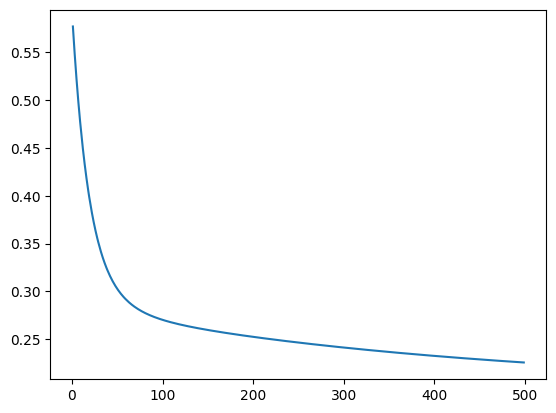

In [53]:
plt.plot(xx, yy)

In [54]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  total_samples = X.shape[0]
  w = np.ones(shape=(number_of_features))
  b = 0
  loss_list = []
  epoch_list = []

  for i in range(epochs):

    random_sample_id = np.random.randint(0, total_samples)
    y_predicted = np.dot(w, X[random_sample_id]) + b

    w_grad = -2 * X[random_sample_id] * (y_true[random_sample_id] - y_predicted)
    b_grad = -2 * (y_true[random_sample_id] - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    loss = mse(y_predicted, y_true[random_sample_id])

    if i%10:
      loss_list.append(loss)
      epoch_list.append(i)


  return w, b, loss, loss_list, epoch_list


In [55]:
weights, bias, loss, yy, xx = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]), epochs = 1000, learning_rate = 0.01)

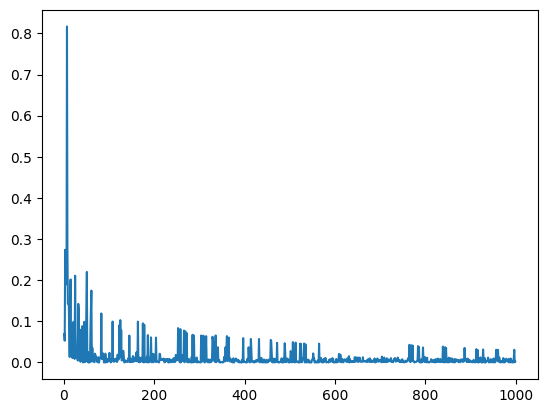

In [56]:
plt.plot(xx, yy)

In [57]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b

    return sy.inverse_transform([[scaled_price]])[0][0]

print(predict(2600,4,weights,bias))
print(predict(1000,2,weights,bias))
print(predict(1500,3,weights,bias))

125.8876666674806
35.33148240935258
71.15987342155753


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [58]:
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    total_samples = X.shape[0]
    batch_size = round(total_samples / 3)

    w = np.ones(shape=(number_of_features))
    b = 0
    loss_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = np.random.choice(total_samples, batch_size, replace=False)
        X_batch = X[random_index]
        y_batch = y_true[random_index]

        y_predicted = np.dot(X_batch, w) + b

        w_grad = (2/batch_size) * X_batch.T.dot(y_predicted - y_batch)
        b_grad = (2/batch_size) * np.sum(y_predicted - y_batch)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        loss = mse(y_predicted, y_batch)

        if i % 10 == 0:
            loss_list.append(loss)
            epoch_list.append(i)

    return w, b, loss, loss_list, epoch_list


In [59]:
weights, bias, loss, yy, xx = mini_batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]), epochs=1000, learning_rate=0.01)

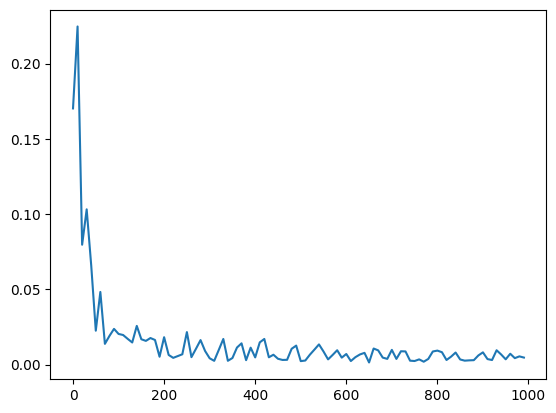

In [60]:
plt.plot(xx, yy)

***TUTORIAL 16 (tensorboard skipped) =================================================***

***TUTORIAL 17=================================================***

In [61]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [62]:
tf.test.is_built_with_cuda()

True

In [63]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [64]:
X_train.shape

(50000, 32, 32, 3)

In [65]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [66]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [67]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10,)
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)

In [68]:
y_train_categorical[0:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [69]:
y_train[0:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [70]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=5)

model.evaluate(X_test_scaled, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - accuracy: 0.3040 - loss: 1.9312
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 84ms/step - accuracy: 0.4216 - loss: 1.6470
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.4517 - loss: 1.5535
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 158s 93ms/step - accuracy: 0.4781 - loss: 1.4868
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 85ms/step - accuracy: 0.4930 - loss: 1.4400
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.4719 - loss: 1.4849


[1.493910312652588, 0.46700000762939453]

In [71]:
y_predicted = model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


In [72]:
print(y_predicted[212].argmax())
print(y_test[212][0])
print("=================================")

print(y_predicted[5].argmax())
print(y_test[5][0])
print("=================================")

print(y_predicted[313].argmax())
print(y_test[313][0])
print("=================================")

print(y_predicted[28].argmax())
print(y_test[28][0])
print("=================================")

print(y_predicted[57].argmax())
print(y_test[57][0])
print("=================================")

print(y_predicted[99].argmax())
print(y_test[99][0])
print("=================================")

3
5
6
6
0
0
9
9
9
7
7
7


array([[[234, 233, 238],
        [238, 237, 241],
        [239, 238, 242],
        ...,
        [246, 244, 247],
        [248, 246, 249],
        [249, 248, 251]],

       [[229, 228, 233],
        [232, 231, 236],
        [233, 232, 237],
        ...,
        [244, 242, 245],
        [246, 244, 247],
        [248, 246, 248]],

       [[231, 230, 236],
        [233, 232, 238],
        [233, 232, 238],
        ...,
        [250, 248, 250],
        [251, 249, 251],
        [252, 251, 252]],

       ...,

       [[115,  75,  55],
        [107,  72,  55],
        [106,  71,  56],
        ...,
        [226, 198, 151],
        [212, 176, 128],
        [217, 181, 131]],

       [[113,  74,  55],
        [103,  70,  55],
        [ 99,  69,  55],
        ...,
        [215, 191, 138],
        [206, 182, 128],
        [207, 177, 129]],

       [[106,  71,  54],
        [105,  72,  57],
        [103,  72,  56],
        ...,
        [203, 178, 125],
        [213, 193, 137],
        [199, 178, 127]]], dtype=uint8)
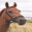

In [73]:
X_test[99]

***TUTORIAL 18=================================================***

In [74]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/refs/heads/master/11_chrun_prediction/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5883,6131-JLWZM,Female,0,No,No,13,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.30,275.4,No
4495,4702-IOQDC,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.10,70.1,Yes
5590,0487-VVUVK,Male,0,Yes,Yes,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.15,477.6,No
1571,2812-SFXMJ,Male,0,No,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
2207,4285-GYRQC,Female,0,Yes,No,7,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,86.25,587.1,Yes


In [75]:
df.drop('customerID', axis='columns', inplace=True)
df.sample(5)
print(df.dtypes)
print(df.shape)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
(7043, 20)


In [76]:
df.TotalCharges.values
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [77]:
df1 = df[pd.to_numeric(df.TotalCharges, errors='coerce').notnull()]

In [78]:
print(df1.shape)
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.dtypes

(7032, 20)


<ipython-input-78-6c8a94d5ba3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [79]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

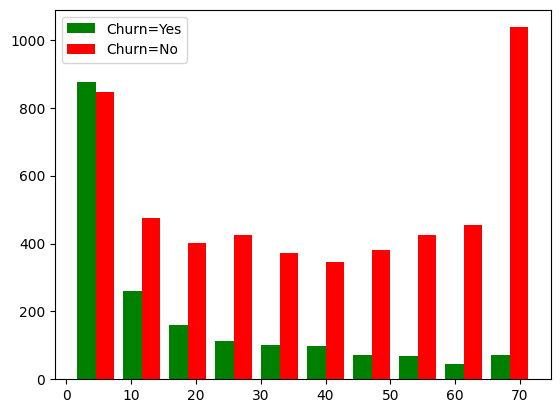

In [80]:
plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn=Yes', 'Churn=No'], color=['green', 'red'])
plt.legend()

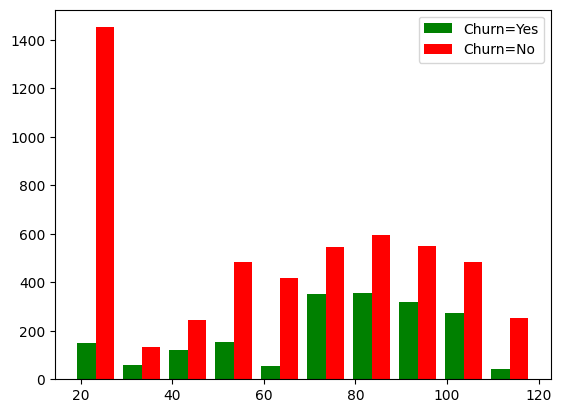

In [81]:
tenure_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges
plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn=Yes', 'Churn=No'], color=['green', 'red'])
plt.legend()

In [82]:
def print_unique_col_values(df):
  for column in df:
    # if df[column].dtypes == 'object':
      print(f'{column}: {df[column].unique()}')

print_unique_col_values(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [83]:
df1['gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
df1['Partner'].replace({'Yes': 1, 'No': 0}, inplace=True)
df1['Dependents'].replace({'Yes': 1, 'No': 0}, inplace=True)
df1['PhoneService'].replace({'Yes': 1, 'No': 0}, inplace=True)
df1['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 0}, inplace=True)
df1['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
df1['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
df1['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
df1['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
df1['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
df1['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
df1['PaperlessBilling'].replace({'Yes': 1, 'No': 0}, inplace=True)
df1['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)

<ipython-input-83-42e1ef8ca89b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
<ipython-input-83-42e1ef8ca89b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
<ipython-input

In [84]:
print_unique_col_values(df1)

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [85]:
df2 = pd.get_dummies(df1, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

# Convert only the dummy columns to integer
df2[df2.select_dtypes('bool').columns] = df2.select_dtypes('bool').astype(int)


In [86]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6982,0,0,1,1,72,1,0,1,1,1,...,74.35,5237.40,0,0,0,0,1,0,1,0
6544,0,1,0,0,42,1,1,0,1,1,...,104.75,4323.45,1,1,0,0,0,0,0,0
4815,1,0,0,0,38,1,0,0,0,0,...,70.45,2597.60,1,1,0,1,0,0,0,0
605,1,0,1,0,72,1,1,1,0,1,...,86.65,6094.25,0,0,0,0,1,1,0,0


In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])

In [88]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2909,0,0,0,0,0.591549,1,0,0,1,0,...,0.370149,0.279881,0,0,0,1,0,0,1,0
2149,0,0,0,0,0.633803,1,1,0,0,1,...,0.824378,0.537226,0,1,0,1,0,0,1,0
2503,1,0,1,1,0.605634,1,0,0,0,0,...,0.023383,0.104685,0,0,1,1,0,0,0,0
2802,1,1,1,0,0.436620,1,1,0,0,1,...,0.862189,0.384578,1,1,0,0,0,0,1,0
1875,1,0,1,0,1.000000,1,1,1,1,1,...,0.953731,0.930949,0,1,0,0,1,1,0,0


In [89]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
X_train.shape

(5625, 23)

In [92]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(23,)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=20)

model.evaluate(X_test, y_test)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.6753 - loss: 0.6160
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7383 - loss: 0.5005
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.7628 - loss: 0.4617
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7862 - loss: 0.4418
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.7999 - loss: 0.4202
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7914 - loss: 0.4254
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.7960 - loss: 0.4241
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7999 - loss: 0.4210
Epoch 9/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8033 - loss: 0.4191
Epoch 10/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.8058 - loss: 0.4189
Epoch 11/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8016 - loss: 0.4195
Epoch 12/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/ste

[0.4346274137496948, 0.7889125943183899]

In [93]:
y_pred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [94]:
print(y_pred[0:20].round(0))
print("==================================")
print(y_test[0:20])



[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]]
2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
2173    0
1291    1
2579    0
6578    0
2515    0
3257    0
1976    1
132     0
5194    1
1950    1
Name: Churn, dtype: int64


In [95]:
from sklearn.metrics import classification_report

y_pred_binary = (y_pred >= 0.5).astype(int)  # Convert probabilities to 0 or 1

print(classification_report(y_test, y_pred_binary))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

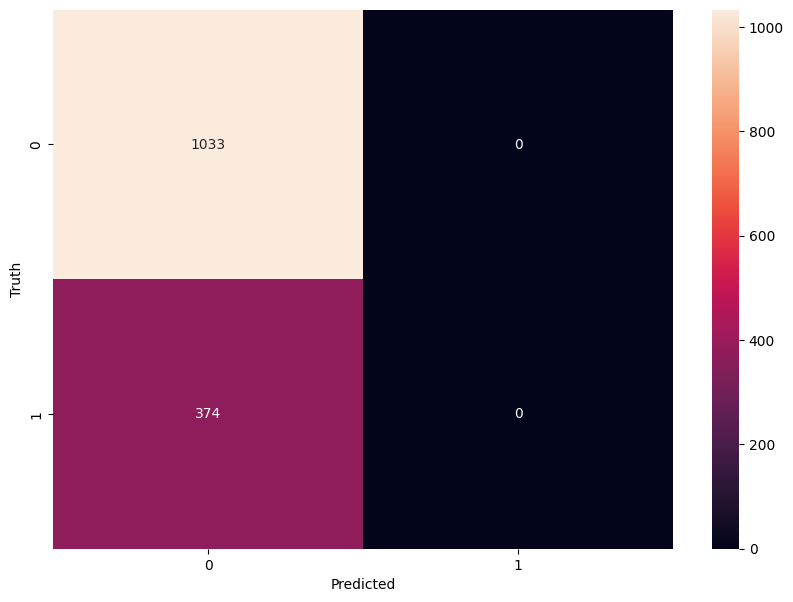

In [96]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

***TUTORIAL 19=================================================***

In [97]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd

In [98]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [99]:
truth =      ["Dog","Not a dog","Dog","Dog",      "Dog", "Not a dog", "Not a dog", "Dog",       "Dog", "Not a dog"]
prediction = ["Dog","Dog",      "Dog","Not a dog","Dog", "Not a dog", "Dog",       "Not a dog", "Dog", "Dog"]

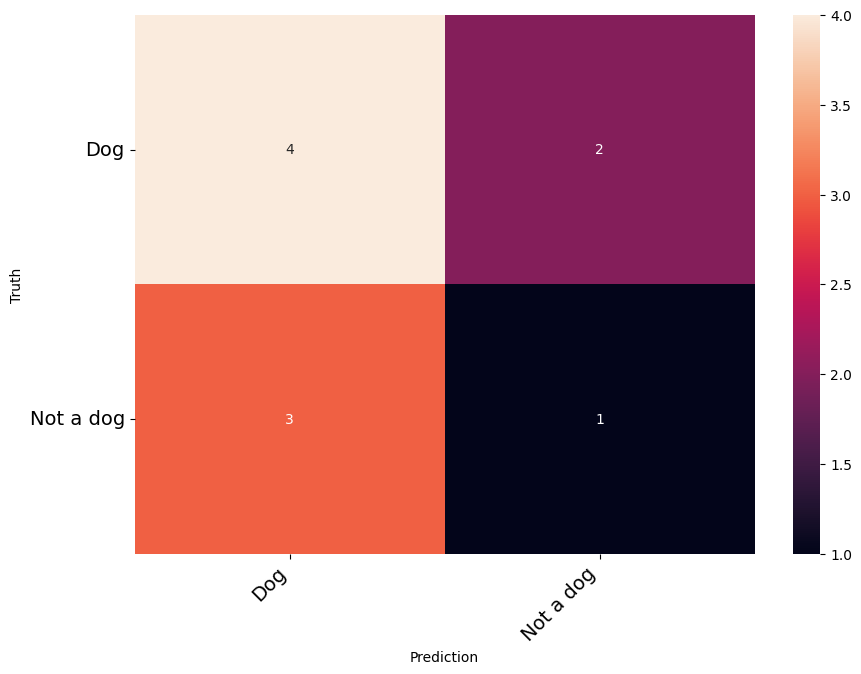

In [100]:
import seaborn as sns
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["Dog","Not a dog"])

In [101]:
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

         Dog       0.57      0.67      0.62         6
   Not a dog       0.33      0.25      0.29         4

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45        10
weighted avg       0.48      0.50      0.48        10



***TUTORIAL 20=================================================***

In [102]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/refs/heads/master/13_dropout_layer/sonar_dataset.csv", header=None)

df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
118,0.0363,0.0478,0.0298,0.0210,0.1409,0.1916,0.1349,0.1613,0.1703,0.1444,...,0.0115,0.0190,0.0055,0.0096,0.0050,0.0066,0.0114,0.0073,0.0033,M
156,0.0047,0.0059,0.0080,0.0554,0.0883,0.1278,0.1674,0.1373,0.2922,0.3469,...,0.0095,0.0126,0.0069,0.0039,0.0068,0.0060,0.0045,0.0002,0.0029,M
46,0.0308,0.0339,0.0202,0.0889,0.1570,0.1750,0.0920,0.1353,0.1593,0.2795,...,0.0167,0.0127,0.0138,0.0090,0.0051,0.0029,0.0122,0.0056,0.0020,R
148,0.0712,0.0901,0.1276,0.1497,0.1284,0.1165,0.1285,0.1684,0.1830,0.2127,...,0.0154,0.0156,0.0054,0.0030,0.0048,0.0087,0.0101,0.0095,0.0068,M
173,0.0329,0.0216,0.0386,0.0627,0.1158,0.1482,0.2054,0.1605,0.2532,0.2672,...,0.0095,0.0151,0.0059,0.0015,0.0053,0.0016,0.0042,0.0053,0.0074,M


In [103]:
df.shape

(208, 61)

In [104]:
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


In [105]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [106]:
df[60].value_counts()

,count
60,
M,111
R,97


In [107]:
X = df.drop(60, axis='columns')
y = df[60]
X.shape

y = y.replace({'R': 1, 'M': 0})

<ipython-input-107-4417aa8fd9dd>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'R': 1, 'M': 0})


In [108]:
y[0:5]

,60
0,1
1,1
2,1
3,1
4,1


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(60,)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=100, batch_size=8)

model.evaluate(X_test, y_test)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5421 - loss: 0.7040
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6363 - loss: 0.6759
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6356 - loss: 0.6574
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7166 - loss: 0.6106
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8618 - loss: 0.5932
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7686 - loss: 0.5514
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7530 - loss: 0.5484
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8359 - loss: 0.4956
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8536 - loss: 0.4817
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7550 - loss: 0.4679
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7454 - loss: 0.4743  
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7649 - 

[0.5067268013954163, 0.8571428656578064]

In [111]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [112]:
print(y_pred[0:20].round(0))
print("==================================")
print(y_test[0:20])


[[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]]
161    0
15     1
73     1
96     1
166    0
9      1
100    0
135    0
18     1
148    0
171    0
30     1
155    0
180    0
125    0
197    0
164    0
190    0
84     1
75     1
Name: 60, dtype: int64


In [113]:
from sklearn.metrics import classification_report

y_pred_binary = (y_pred >= 0.5).astype(int)  # Convert probabilities to 0 or 1

print(classification_report(y_test, y_pred_binary))


              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.75      0.94      0.83        16

    accuracy                           0.86        42
   macro avg       0.85      0.87      0.85        42
weighted avg       0.88      0.86      0.86        42



In [114]:
modeld = keras.Sequential([
    keras.layers.Flatten(input_shape=(60,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

modeld.fit(X_train, y_train, epochs=100, batch_size=8)

modeld.evaluate(X_test, y_test)

y_pred = modeld.predict(X_test)

from sklearn.metrics import classification_report

y_pred_binary = (y_pred >= 0.5).astype(int)  # Convert probabilities to 0 or 1

print(classification_report(y_test, y_pred_binary))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5471 - loss: 0.7268
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4731 - loss: 0.7459 
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6080 - loss: 0.7094 
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4602 - loss: 0.7467 
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4903 - loss: 0.6884 
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5490 - loss: 0.6934 
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5805 - loss: 0.6680 
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5467 - loss: 0.6832
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5718 - loss: 0.6938 
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4765 - loss: 0.6998
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6320 - loss: 0.6788 
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
              precision    recall  f1-score   support

           0       0.95      0.73      0.83        26
           1       0.68      0.94      0.79        16

    accuracy                           0.81        42
   macro avg       0.82      0.83      0.81        42
weighted avg       0.85      0.81      0.81        42



***TUTORIAL 21=================================================***

In [115]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/refs/heads/master/11_chrun_prediction/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3102,0516-WJVXC,Female,0,No,No,5,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Electronic check,54.20,308.25,Yes
3750,4415-WNGVR,Female,1,Yes,No,12,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,79.20,943.85,No
929,8812-ZRHFP,Female,0,Yes,Yes,30,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,One year,No,Electronic check,86.45,2538.05,No
663,9565-FLVCG,Male,0,Yes,Yes,65,Yes,Yes,DSL,Yes,...,No,No,No,Yes,Two year,Yes,Mailed check,69.55,4459.15,No
2815,0772-GYEQQ,Male,0,No,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Month-to-month,Yes,Mailed check,88.35,262.05,Yes


In [116]:
df.drop('customerID',axis='columns',inplace=True)


In [117]:
df.TotalCharges.values


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [118]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
df[df.TotalCharges!=' '].shape
df1 = df[df.TotalCharges!=' ']
df1.shape
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.values
df1[df1.Churn=='No']


<ipython-input-118-ce0819f65179>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


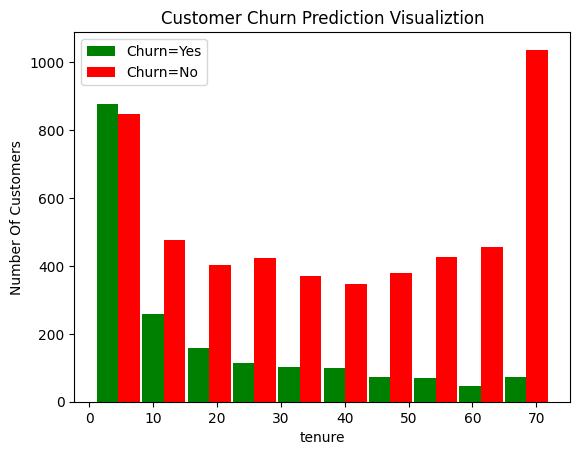

In [119]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

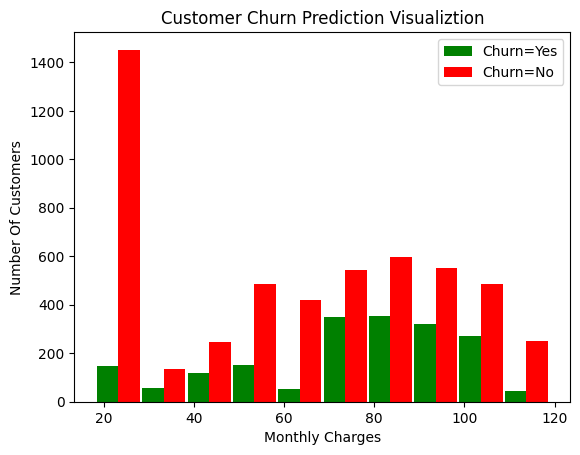

In [120]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [121]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [122]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-122-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-122-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [123]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

<ipython-input-123-34dfac0bf179>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
<ipython-input-123-34dfac0bf179>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
<ipython-input-123-34dfac0bf179>:4: 

In [124]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [125]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-125-ba153b6b6960>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-125-ba153b6b6960>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-125-b

In [126]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [127]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [128]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [129]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [130]:
from tensorflow.keras import losses

In [131]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [132]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [133]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7231 - loss: 0.5793
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7621 - loss: 0.4437
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.4293
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7926 - loss: 0.4330
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7906 - loss: 0.4227
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8097 - loss: 0.4047
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8094 - loss: 0.4042
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8103 - loss: 0.4001
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8094 - loss: 0.4005
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8186 - loss: 0.3986
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8046 - loss: 0.4029
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━